https://ochem.eu/static/challenge.do

# TOX24

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from rdkit import Chem
import pandas as pd
from rdkit.Chem import AllChem, DataStructs
from sklearn.manifold import TSNE


import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv, global_mean_pool, BatchNorm, global_max_pool
from torch_geometric.data import Data, DataLoader
from rdkit import Chem

from torch.optim.lr_scheduler import ReduceLROnPlateau

In [54]:
datafile = pd.read_csv("tox24_challenge_train.csv")

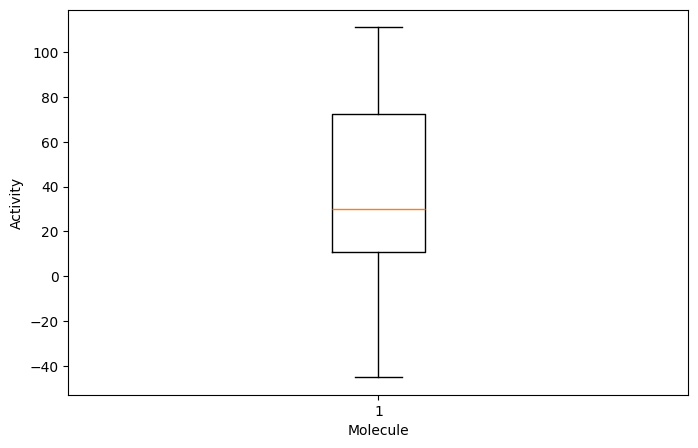

In [55]:
plt.figure(figsize=(8, 5))
plt.boxplot(datafile["activity"])
plt.xlabel("Molecule")
plt.ylabel("Activity")
plt.show()

In [56]:
def get_num_nodes(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol.GetNumAtoms() if mol else 0

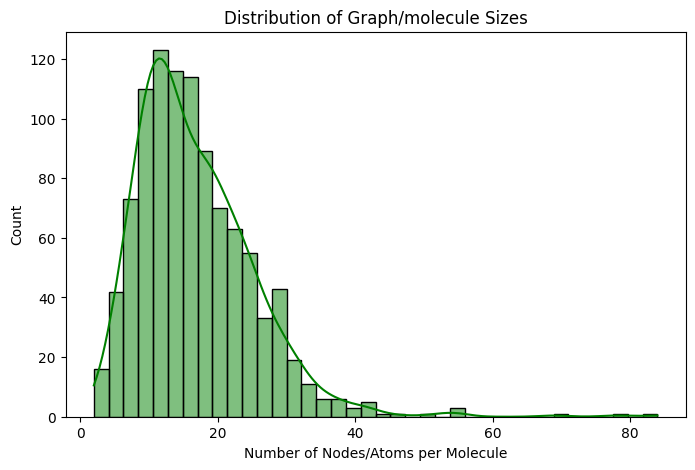

In [57]:
smiles_list = datafile["SMILES"].to_list()
activity_values = datafile["activity"].to_list()
num_nodes = [get_num_nodes(s) for s in smiles_list]
datafile["atoms"] = num_nodes

plt.figure(figsize=(8, 5))
sns.histplot(num_nodes,  kde=True, color='g')
plt.xlabel("Number of Nodes/Atoms per Molecule")
plt.ylabel("Count")
plt.title("Distribution of Graph/molecule Sizes")
plt.show()

In [210]:
datafile = datafile[datafile["atoms"]<=40]

In [249]:
smiles_list = datafile["SMILES"].to_list()
activity_values = datafile["activity"].to_list()
size = datafile["atoms"].to_list()

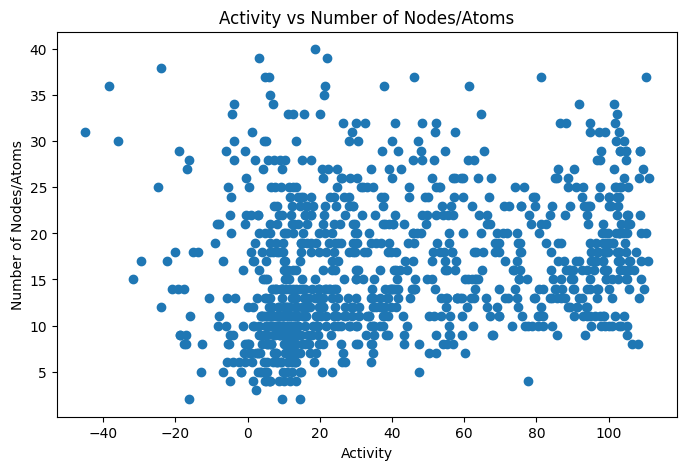

In [131]:
plt.figure(figsize=(8, 5))
plt.scatter(datafile.activity,datafile.atoms)
plt.xlabel("Activity")
plt.ylabel("Number of Nodes/Atoms")
plt.title("Activity vs Number of Nodes/Atoms")
plt.show()

In [207]:
#Chemical space

In [201]:
def smiles_to_fingerprint(smiles, radius=2, n_bits=1028):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    arr = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

In [202]:
fingerprints = np.array([smiles_to_fingerprint(s) for s in smiles_list if smiles_to_fingerprint(s) is not None])

[01:23:12] DEPRECATION WARNING: please use MorganGenerator
[01:23:12] DEPRECATION WARNING: please use MorganGenerator
[01:23:12] DEPRECATION WARNING: please use MorganGenerator
[01:23:12] DEPRECATION WARNING: please use MorganGenerator
[01:23:12] DEPRECATION WARNING: please use MorganGenerator
[01:23:12] DEPRECATION WARNING: please use MorganGenerator
[01:23:12] DEPRECATION WARNING: please use MorganGenerator
[01:23:12] DEPRECATION WARNING: please use MorganGenerator
[01:23:12] DEPRECATION WARNING: please use MorganGenerator
[01:23:12] DEPRECATION WARNING: please use MorganGenerator
[01:23:12] DEPRECATION WARNING: please use MorganGenerator
[01:23:12] DEPRECATION WARNING: please use MorganGenerator
[01:23:12] DEPRECATION WARNING: please use MorganGenerator
[01:23:12] DEPRECATION WARNING: please use MorganGenerator
[01:23:12] DEPRECATION WARNING: please use MorganGenerator
[01:23:12] DEPRECATION WARNING: please use MorganGenerator
[01:23:12] DEPRECATION WARNING: please use MorganGenerat

In [203]:
tsne = TSNE(n_components=2, random_state=42, perplexity=50) #https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html
embedding = tsne.fit_transform(fingerprints)

In [204]:
df = pd.DataFrame(embedding, columns=["X", "Y"])
df["Activity"] = activity_values[:len(df)]
df["size"] = size[:len(df)]

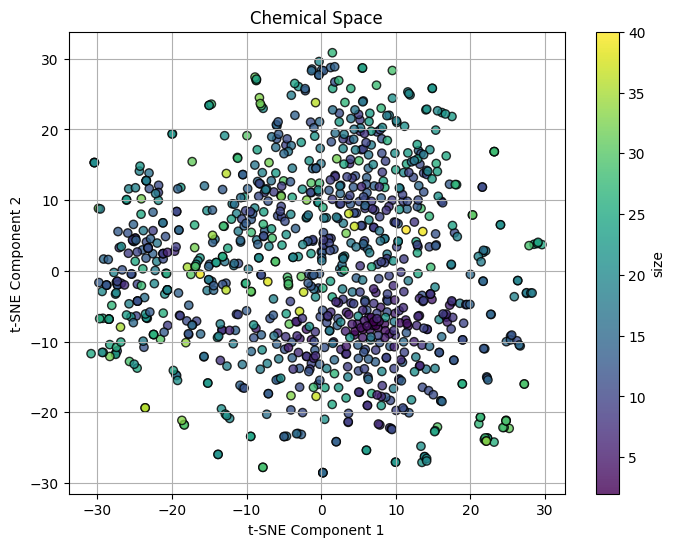

In [205]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df["X"], df["Y"], c=df["size"], cmap="viridis", edgecolors='k', alpha=0.8)
plt.colorbar(scatter, label="size")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Chemical Space")
plt.grid(True)
plt.show()

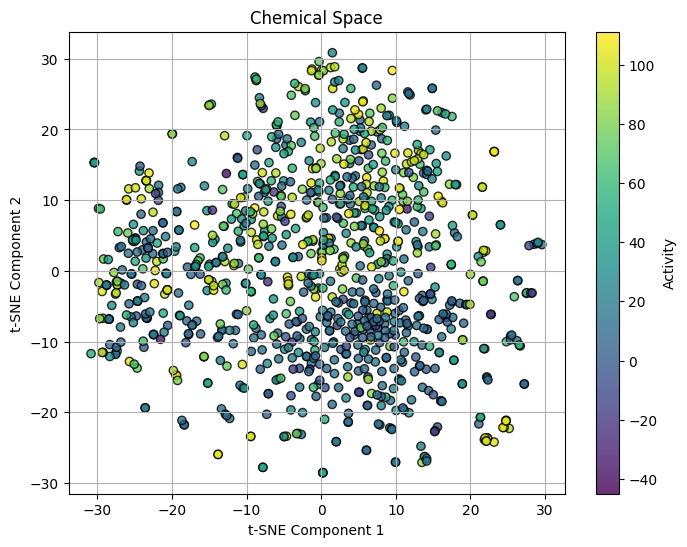

In [206]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df["X"], df["Y"], c=df["Activity"], cmap="viridis", edgecolors='k', alpha=0.8)
plt.colorbar(scatter, label="Activity")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Chemical Space")
plt.grid(True)
plt.show()

In [258]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #scaling
list(scaler.fit_transform(np.array(activity_values).reshape(1, -1)))

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [257]:
np.array(activity_values).reshape(1, -1)

array([[ 12.3,  94.1,  38.1,  11.8,  98.4,  52.2,  32.8,  14. ,  69.6,
         61.9,  75.5,  38.8,  19. ,  94.3,  28. ,   3.9, 101.7, -29.5,
          5.5,  33.5,   8.9,  28. ,  10.1,  69.5,   5.1,  71.3,  29.7,
          3. , -22.4,  10.5,   7.9,  34.2,  23.8,  24.8,  52.4,  63. ,
         90.3,  35.1,  14.7,  19.5,   9.9,  55. ,  11.8,   6.4,   9.6,
         46.3,  41.1,  10.6,   3.3,  46.1,  98. ,   6.1,  34.4,  13.4,
          8.3,  20.8,  56. ,  60.9,  23.4,  63.1,  13.4,  10.2,  -6.8,
          5.3,   7.5,  17.8,   1.5,  14.1,  36.8,  -5.8,  10.9,   8.2,
          6.5,  11.1,  71.3,   0.2, -31.8,  99.7, 108.1,  20.8,  69.5,
        -12.7,  55. ,  10.5,  -5.1,  12.9,  92.6,  29. ,  46.8,  87.9,
         13.9,  55.8,   8.7,  79.4,   5.4,  38.8,  56.8,   9.4,   6.6,
          6.1, 104.3,  -0.8,   8.3,  11.1, 105.7,   8.7,  26. ,  10.2,
          8.6,   5.3,  23.2,  30.3,  -8.2,  10.1,  53.1,  58.7,  68.1,
         13.4,  98.3,  19.1,  17.1,  75. , 101. ,  37.4,  23.3,  52.3,
      

In [226]:
class GATNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels=512, out_channels=1, heads=4, dropout=0.1):
        super(GATNet, self).__init__()

        # First GAT layer (multi-head attention)
        self.conv1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.bn1 = BatchNorm(hidden_channels * heads)
        self.dropout1 = torch.nn.Dropout(dropout)

        # Second GAT layer
        self.conv2 = GATConv(hidden_channels * heads, hidden_channels, heads=heads)
        self.bn2 = BatchNorm(hidden_channels * heads)
        self.dropout2 = torch.nn.Dropout(dropout)

        # Third GAT layer (newly added for deeper learning)
        self.conv3 = GATConv(hidden_channels * heads, hidden_channels, heads=heads)
        self.bn3 = BatchNorm(hidden_channels * heads)
        self.dropout3 = torch.nn.Dropout(dropout)

        # Fourth GAT layer (final feature extraction)
        self.conv4 = GATConv(hidden_channels * heads, hidden_channels, heads=4)
        self.bn4 = BatchNorm(hidden_channels * 4)
        self.dropout4 = torch.nn.Dropout(dropout)

        # Fully connected regression output
        self.fc = torch.nn.Linear(hidden_channels * 4, out_channels)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        # First GAT layer
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.elu(x)
        x = self.dropout1(x)

        # Second GAT layer
        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = F.elu(x)
        x = self.dropout2(x)

        # Third GAT layer
        x = self.conv3(x, edge_index)
        x = self.bn3(x)
        x = F.elu(x)
        x = self.dropout3(x)

        # Fourth GAT layer
        x = self.conv4(x, edge_index)
        x = self.bn4(x)
        x = F.elu(x)
        x = self.dropout4(x)

        # Global Max Pooling (graph-level embedding)
        x = global_max_pool(x, batch)

        # Fully connected output for regression
        x = self.fc(x)

        return x.view(-1)  # Output a single continuous value per molecule


In [235]:
def smiles_to_graph(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    x = torch.tensor([[atom.GetAtomicNum()] for atom in mol.GetAtoms()], dtype=torch.float)  # Node features (only atomic number for simplicity)

    edge_index = []
    for bond in mol.GetBonds():
        i, j = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
        edge_index.append((i, j))
        edge_index.append((j, i))  # Bidirectional edges

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous() if edge_index else torch.empty((2, 0), dtype=torch.long)

    return Data(x=x, edge_index=edge_index)

In [236]:
graph_data = []
for s, y in zip(smiles_list, activity_values):
    graph = smiles_to_graph(s)
    if graph is not None:
        graph.y = torch.tensor([y], dtype=torch.float)
        graph_data.append(graph)

dataloader = DataLoader(graph_data, batch_size=100, shuffle=True)

In [237]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Updated model with more hidden neurons and lower dropout
model = GATNet(in_channels=graph_data[0].x.shape[1], hidden_channels=512, out_channels=1, dropout=0.2).to(device)

# Lower learning rate for stable convergence
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

# Learning rate scheduler to adjust training dynamics
scheduler = ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=7, verbose=True)

# Loss function (MSE for regression)
loss_fn = torch.nn.MSELoss()

# Training loop with increased epochs
epochs = 100
for epoch in range(epochs):
    total_loss = 0
    model.train()  # Set model to training mode
    
    for batch in dataloader:
        batch = batch.to(device)
        optimizer.zero_grad()
        
        # Forward pass
        output = model(batch)
        loss = loss_fn(output, batch.y)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    # Compute average loss
    avg_loss = total_loss / len(dataloader)
    
    # Reduce learning rate if needed
    scheduler.step(avg_loss)
    
    # Print loss at every epoch
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")


KeyboardInterrupt: 

In [ ]:
def evaluate(model, dataloader):
    model.eval()
    total_loss = 0
    predictions, actuals = [], []
    with torch.no_grad():
        for batch in dataloader:
            batch = batch.to(device)
            output = model(batch)
            total_loss += loss_fn(output, batch.y).item()
            predictions.extend(output.cpu().numpy())
            actuals.extend(batch.y.cpu().numpy())
    print(f"RMSE: {(total_loss / len(dataloader)) ** 0.5:.4f}")
evaluate(model, dataloader)